In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [52]:
# Load your dataset (replace 'your_dataset.csv' with your actual dataset)
# Assuming your dataset has features (X) and labels (y)
# For example, X could be the features of credit card transactions, and y could be whether it's fraud or not (binary classification).
dataset = pd.read_csv('creditcard.csv')

# Assuming 'fraud' is the target variable (1 for fraud, 0 for non-fraud)
X = dataset.drop('Class', axis=1)  # Features
y = dataset['Class']  # Target variable

target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [53]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)
#model = RandomForestClassifier(n_jobs=4,
                               #random_state=42,
                               #criterion='gini',
                               #n_estimators=100,
                               #verbose=False
                               #)

In [43]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

/var/folders/tn/plph2tpx70z58xxm0sw2wc0c0000gp/T/ipykernel_41087/2931683333.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


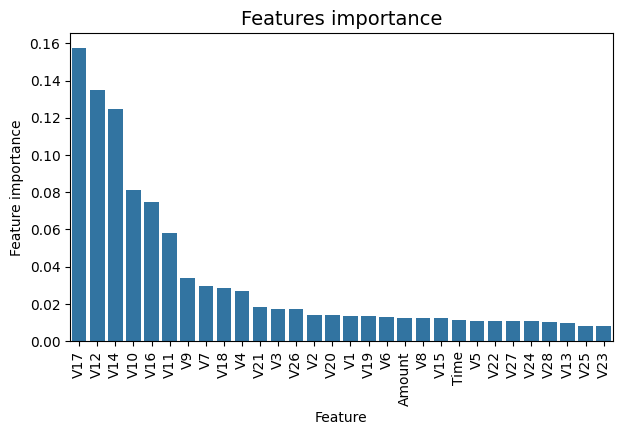

In [45]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': model.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

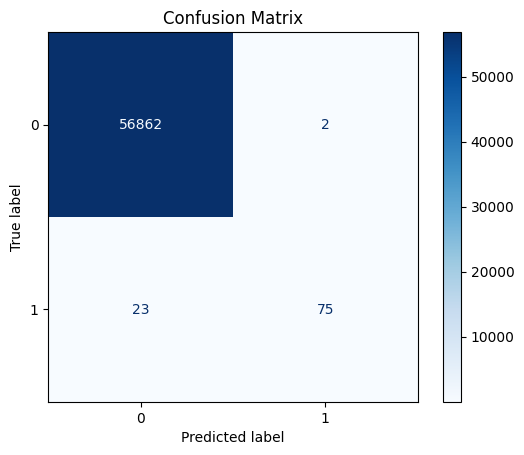

In [46]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [48]:
# Calculate ROC AUC score
y_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

ValueError: y should be a 1d array, got an array of shape (56962, 2) instead.

In [49]:
# Print the results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', classification_rep)
print(f'ROC AUC Score: {roc_auc:.2f}')

Accuracy: 0.9995611109160493

Confusion Matrix:
 [[56862     2]
 [   23    75]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962


NameError: name 'roc_auc' is not defined